<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-II/blob/main/METROPOLIS_HASTINGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# METODO METROPOLIS - HASTINGS
Es un algoritmo MCMC (Monte Carlo Markov Chain) que permite generar muestras de una función de probabilidad cuando no podemos muestrear directamente en ella.

La idea es generar puntos candidatos y decidir si se aceptan o no según una **razon de aceptación**, que compara el valor de la función en el punto propuesto contra el punto actual. Después de muchas iteraciones, los puntos aceptados siguen la froma de la función objetivo, lo que nos permite visualizar y estimar valores como el máximo y el promedio

## GRAFICA OBJETIVO

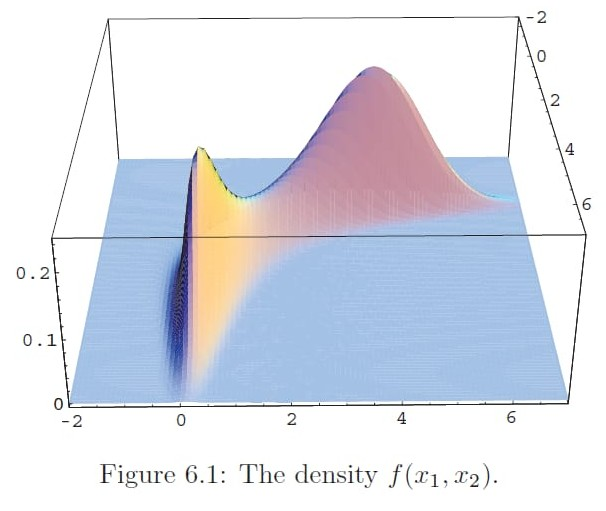

## ¿POR QUÉ FUNCIONA EL ALGORITMO METROPOLIS-HASTINGS?
Funciona porque construye una cadena de Markov cuya distribución estacionaria es exactamente la distribución que se quiere muestrear. A partir de cualquier punto inicial, el algoritmo propone movimientos hacia nuevos puntos y los acepta o rechaza según una regla que preserva la proporción de probabilidades deseada. Con suficientes iteraciones, la cadena “olvida” su estado inicial y las muestras obtenidas se distribuyen como la distribución objetivo, permitiendo estimar integrales o propiedades de esa distribución.


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Se define la función objetivo (sin la connstate c)
def f (x1, x2):
  return np.exp(-0.5 * (x1**2 * x2**2 + x1**2 + x2**2 - 8*x1 - 8*x2))

# Parámetros del algoritmo
n = 70000    # Número de iteraciones
x = np.zeros((n, 2))
x[0] = [0, 0]     # Punto inicial
sigma = 1.0       # Desviación estándar de la propuesta
aceptados = 0

# === Algoritmo Metropolis-Hastings ===
for i in range(1, n):
  # Se propone un nuevo punto cerca del actual
  propuesta = np.random.normal(x[i-1], sigma, size=2)

  # Se calcula la razón de aceptación
  alpha = f(propuesta[0], propuesta[1]) / f(x[i-1,0], x[i-1,1])
  alpha = min(1, alpha)

  # Se acepta o rechaza la propuesta según alpha
  if np.random.rand() < alpha:
    x[i] = propuesta
    aceptados += 1
  else:
    x[i] = x[i-1]

# Se calcula la tasa de aceptación
tasa = aceptados / n
print(f"Tasa de aceptación: {tasa:.4f} ó {tasa*100:.2f}%")
print()

Tasa de aceptación: 0.3050 ó 30.50%



## OBSERVACIÓN SOBRE LA TASA DE ACEPTACIÓN
La tasa de aceptación varía ligeramente entre ejecuciones porque Metropolis-Hastings utiliza muestras aleatorias para proponer nuevos puntos. Sin embargo, que se mantenga alrededor del 30% indica que la elección de la propuesta y la escala del movimiento son razonables: ni se aceptan demasiadas propuestas triviales ni se rechazan la mayoría. En general, una tasa de aceptación entre 20% y 50% suele considerarse eficiente, ya que garantiza que la cadena explore bien el espacio de la distribución objetivo sin quedarse atrapada.

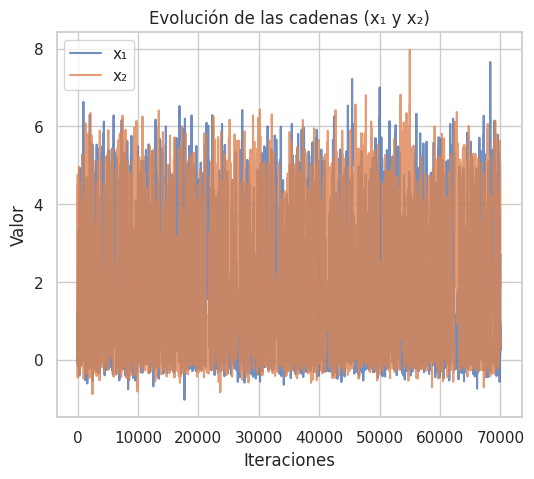

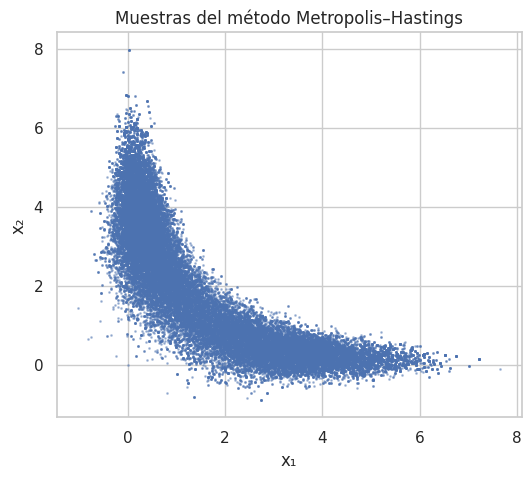

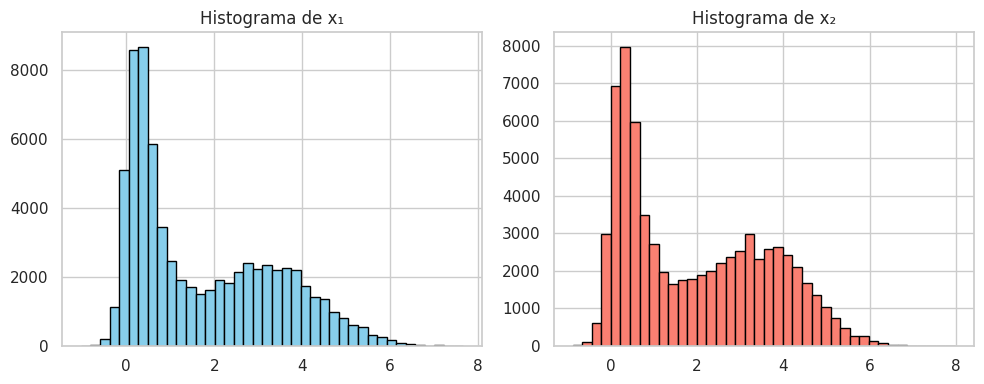

In [19]:
# Visualización de la cadena
plt.figure(figsize=(6,5))
plt.plot(x[:,0], label="x₁", alpha=0.8)
plt.plot(x[:,1], label="x₂", alpha=0.8)
plt.title("Evolución de las cadenas (x₁ y x₂)")
plt.xlabel("Iteraciones")
plt.ylabel("Valor")
plt.legend()
plt.show()

# Gráficas de las muestras
plt.figure(figsize=(6,5))
plt.scatter(x[:,0], x[:,1], s=1, alpha=0.4)
plt.title("Muestras del método Metropolis–Hastings")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

# Histogramas de las variables
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].hist(x[:,0], bins=40, color="skyblue", edgecolor="black")
ax[0].set_title("Histograma de x₁")

ax[1].hist(x[:,1], bins=40, color="salmon", edgecolor="black")
ax[1].set_title("Histograma de x₂")

plt.tight_layout()
plt.show()

## COMPROBACIÓN DE QUE LA MUESTRA SIGUE LA DISTRIBUCIÓN OBJETIVO
1.   Visualización de la cadena:
     *   Al graficar cómo evolucionan los valores de cada coordenada a lo largo de las iteraciones, podemos ver si la cadena explora bien el espacio y si ha alcanzado un comportamiento estable.
     *   Si la cadena se mueve libremente por la región de interés y no queda atrapada, es señal de que el muestreo es adecuado.
2.   Gráfica de las muestras:
     *   Consiste en graficar los puntos generados por la cadena de Metropolis-Hastings.
     *   Permite ver cómo se distribuyen las muestras en el espacio y si siguen la forma de la función objetivo.
     *   Las zonas con mayor densidad de puntos corresponden a los picos de la función objetivo, y las zonas con menos puntos a valores bajos de la  función.
     *   Junto con la visualización de la cadena y el histograma, esta gráfica ayuda a confirmar que la muestra reproduce correctamente la distribución deseada.
3.   Histogramas de las muestras:
      *   Al graficar la distribución de las muestras después de descartar las iteraciones iniciales (“burn-in”), podemos comparar la forma del histograma con la forma esperada de la función objetivo.
      *   Si el histograma coincide con las áreas donde la función objetivo tiene valores más altos, significa que las muestras reflejan correctamente la distribución deseada.








In [30]:
# Se busca el punto donde la función es más alta
valores = np.array([f(x1, x2) for x1, x2 in x])
idx = np.argmax(valores)
max_x1, max_x2 = x[idx]
max_f = valores[idx]
print(f"Máximo estimado en: [{max_x1:.4f}, {max_x2:.4f}]")
print(f"Valor de f en ese punto (máximo de la función): {max_f:.4f}")
print()

Máximo estimado en: [0.2733, 3.7324]
Valor de f en ese punto (máximo de la función): 4913.7092



## CONCLUSIONES
*   La tasa de aceptación alrededor del 30% indica que las propuestas fueron razonables: la cadena explora el espacio eficientemente sin quedarse atrapada.
*   El punto máximo estimado y el valor de la función correspondiente están en línea con lo esperado, confirmando que el algoritmo identifica correctamente regiones de alto valor.
*   En general, Metropolis-Hastings es una herramienta confiable para aproximar integrales, optimizar funciones y muestrear distribuciones complejas mediante simulación estocástica.
*   La visualización de la cadena, los histogramas y la distribución de las muestras muestran que las muestras generadas reflejan adecuadamente la forma de la función objetivo.




